## Data Understanding

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,shapiro,mannwhitneyu

In [2]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df.columns


Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
df.shape

(588101, 7)

In [6]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,588101.0,2.940500e+05,169770.279667,0.0,147025.0,294050.0,441075.0,588100.0
user id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
total ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


The dataset has 588,101 rows and 6 columns. On the coverted column if true means the user bought a product and if false they didn't purchase a product.There are no missing values.

## Data Cleaning
I'll first remove the irrelevant columns 

In [8]:
df = df.drop(columns =['Unnamed: 0','user id'])
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [9]:
# Replacing True with 1 and False with 0 in the 'converted' column
df['converted'] = df['converted'].replace({True: 1, False: 0})

df.head()


C:\Users\Nduta\AppData\Local\Temp\ipykernel_7068\1883575300.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['converted'] = df['converted'].replace({True: 1, False: 0})


,test group,converted,total ads,most ads day,most ads hour
0,ad,0,130,Monday,20
1,ad,0,93,Tuesday,22
2,ad,0,21,Tuesday,18
3,ad,0,355,Tuesday,10
4,ad,0,276,Friday,14


## EDA

### Univariate Analysis

#### Checking the distribution of test groups

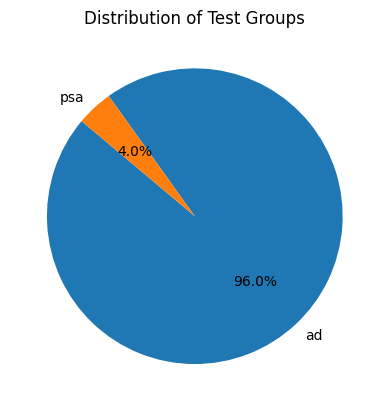

In [10]:
# a pie chart of the 'test group' column
df['test group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Test Groups')
plt.ylabel('') 
plt.show()


#### How much was converted and how much was not?

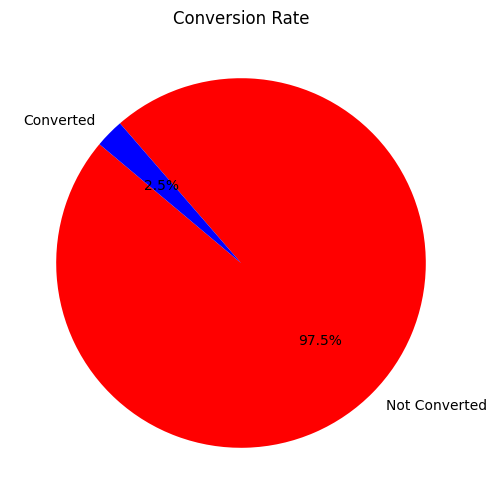

In [11]:
# Getting the counts of 1s and 0s in the 'converted' column
conversion_counts = df['converted'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(conversion_counts, labels=['Not Converted', 'Converted'], autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('Conversion Rate')
plt.show()



#### Which days were ads viewed mostly?

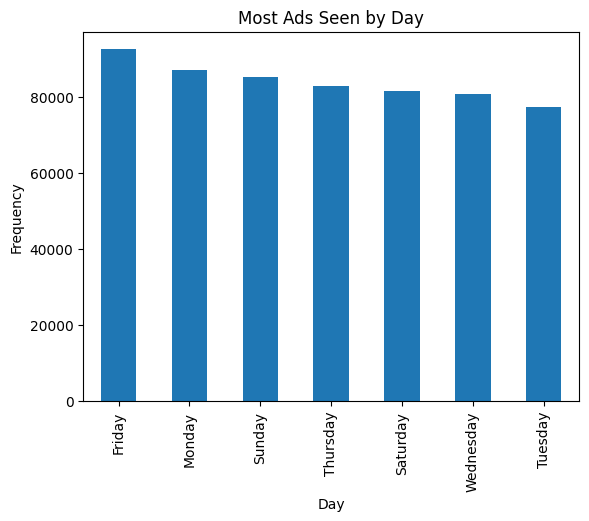

In [12]:
df['most ads day'].value_counts().plot(kind='bar')
plt.title('Most Ads Seen by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()


#### At what time are most ads seen?

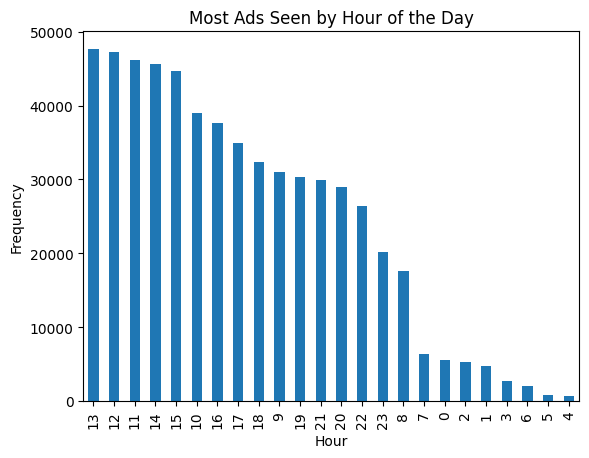

In [13]:
df['most ads hour'].value_counts().plot(kind='bar')
plt.title('Most Ads Seen by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()


#### Observations
- We have two test groups. People who saw ads and people who saw the public service announcement. Majority of the people are who saw the ads.
- 97.5% of the people bought the product while 2.5% bought the product.
- Friday is the day most people watched the ads and Tuesday is the least viewed day.
- Most ads were viewed around 1pm and least were viewed around 4pm.

## Bivariate Analysis

#### How Do Conversions and Non-Conversions Vary by the Day with the Most Ads Seen?

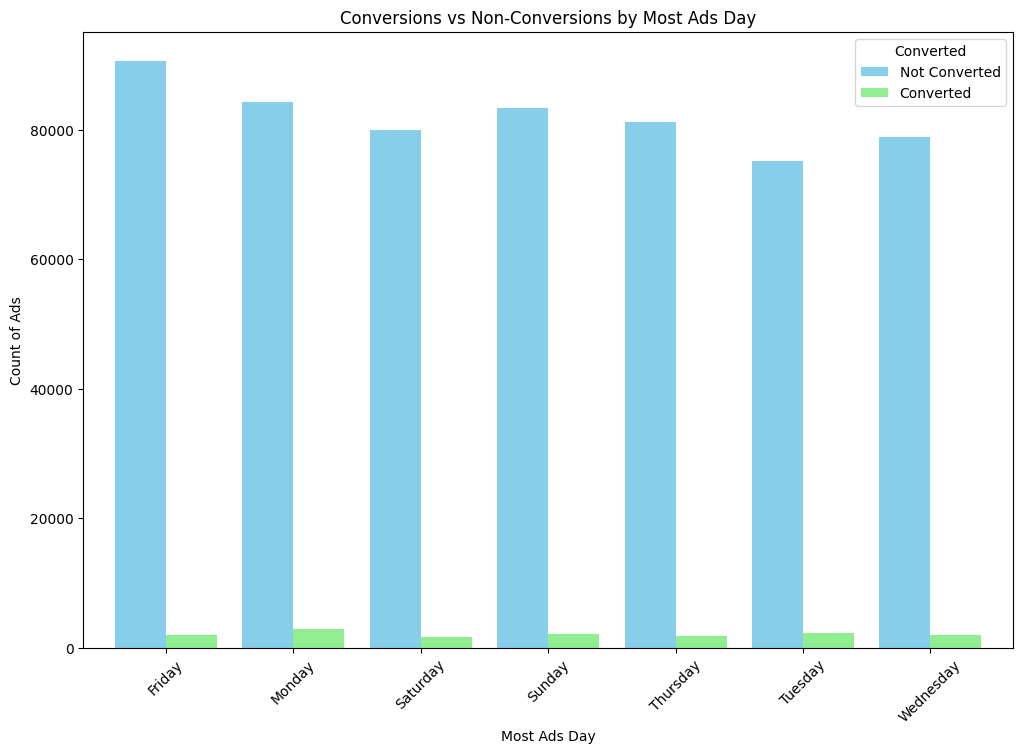

In [14]:
# Grouping the data by 'most ads day' and 'converted', then counting the occurrences
ads_conversion_by_day = df.groupby(['most ads day', 'converted']).size().unstack()

# Plotting the grouped data
ads_conversion_by_day.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightgreen'], width=0.8)
plt.title('Conversions vs Non-Conversions by Most Ads Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Count of Ads')
plt.xticks(rotation=45)
plt.legend(title='Converted', labels=['Not Converted', 'Converted'])
plt.show()


#### How Do Conversion Rates Compare Between Different Test Groups (Ad vs PSA)?

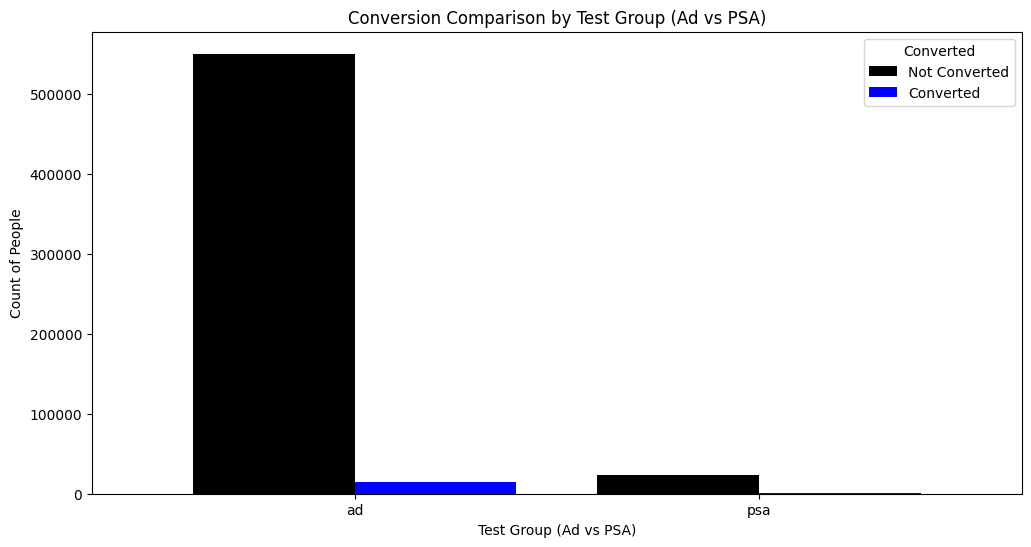

In [15]:
conversion_by_test_group = df.groupby(['test group', 'converted']).size().unstack()

# Plotting
conversion_by_test_group.plot(kind='bar', figsize=(12, 6), color=['black', 'blue'], width=0.8)
plt.title('Conversion Comparison by Test Group (Ad vs PSA)')
plt.xlabel('Test Group (Ad vs PSA)')
plt.ylabel('Count of People')
plt.xticks(rotation=0)
plt.legend(title='Converted', labels=['Not Converted', 'Converted'])
plt.show()


#### What Is the Distribution of Total Ads Seen for Those Who Converted vs. Those Who Did Not?

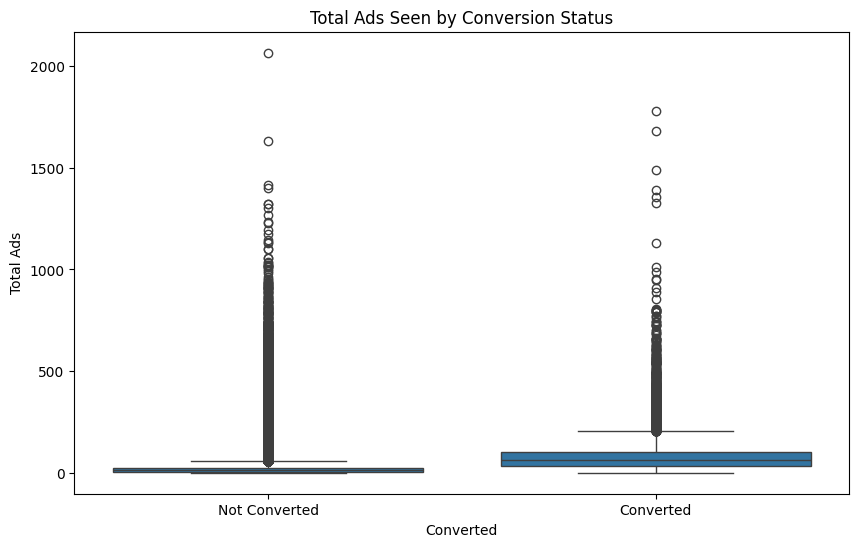

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='converted', y='total ads', data=df)
plt.title('Total Ads Seen by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Total Ads')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()


#### Observations
- Monday had the most converted ads while friday had the most ads that were not converted.
- Most of the ad test group converted but keeping in mind of the class imbalance cause most of the people were exposed to ads compared to psa group
- Most of the ads were not converted

## Statistical Testing

#### Test for normality

We will first start by checking for normality

In [17]:
#Contingency table
contingency_table = pd.crosstab(df['test group'], df['converted'])

# Calculating expected frequencies
_, _, _, expected_frequencies = chi2_contingency(contingency_table)

# Printing expected frequencies
print("Expected Frequencies:")
print(expected_frequencies)

# Checking if any expected frequencies are less than 5
if (expected_frequencies < 5).any():
    print("Warning: Some expected frequencies are less than 5. This may affect the reliability of the Chi-Square test results.")
else:
    print("All expected frequencies are greater than or equal to 5. The Chi-Square test results should be reliable.")


Expected Frequencies:
[[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]]
All expected frequencies are greater than or equal to 5. The Chi-Square test results should be reliable.


All expected frequencies in the contingency table are greater than or equal to 5. This satisfies the assumption for the Chi-Square Test, ensuring that the results of the Chi-Square Test should be reliable. We can proceed with the Chi-Square Test to assess the association between the variables.

#### Chi-square Test



Null Hypothesis (H₀): There is no association between the test group (ad vs. PSA) and the conversion rate. In other words, the type of test group does not affect whether someone converts or not.

Alternative Hypothesis (H₁): There is an association between the test group and the conversion rate. This means the type of test group (ad vs. PSA) does affect whether someone converts.

In [18]:
# Performing the Chi-Square Test
chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

print("Chi-Square Test Result:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_value}")


Chi-Square Test Result:
Chi2 Stat: 54.005823883685245
P-Value: 1.9989623063390075e-13


#### Observations
The p-value obtained is exceedingly small, far below the typical threshold of 0.05. This indicates a high level of statistical significance. The chi-square statistic is notably high, which further supports the conclusion that the observed differences are not due to chance.

Given the very low p-value, we can confidently reject the null hypothesis. This indicates a significant relationship between the type of test group (ad vs. PSA) and the conversion outcome. In other words, the type of advertisement significantly affects the likelihood of conversion.

The analysis reveals that the type of advertisement (either 'ad' or 'PSA') has a substantial impact on conversion rates. Further examination is needed to determine which test group—'ad' or 'PSA'—results in higher conversion rates and to understand the underlying factors contributing to this difference.

#### Test for normality

In [19]:
# Splitting the data based on test_group
ads_ad = df[df['test group'] == 'ad']['total ads']
ads_psa = df[df['test group'] == 'psa']['total ads']

# Performing Shapiro-Wilk test for normality
stat_ad, p_ad = shapiro(ads_ad)
stat_psa, p_psa = shapiro(ads_psa)

print("Normality Test Results:")
print(f"Ad Group - Shapiro-Wilk Test Statistic: {stat_ad}, p-value: {p_ad}")
print(f"PSA Group - Shapiro-Wilk Test Statistic: {stat_psa}, p-value: {p_psa}")


Normality Test Results:
Ad Group - Shapiro-Wilk Test Statistic: 0.47862770192829296, p-value: 3.701044472444164e-203
PSA Group - Shapiro-Wilk Test Statistic: 0.515901874841278, p-value: 7.270789402370636e-120


c:\Users\Nduta\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 564577.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Nduta\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23524.
  res = hypotest_fun_out(*samples, **kwds)


Both p-values are extremely small, far below the common significance level of 0.05. This suggests that the data in both groups significantly deviates from a normal distribution. This result indicates that the assumption of normality, which is required for parametric tests like the t-test, is not met in this case.

Given the non-normal distribution of the data, the Mann-Whitney U test is a suitable alternative to assess the differences between the ad and psa groups. The Mann-Whitney U test is a non-parametric test that does not assume normality and is specifically designed to compare distributions between two independent groups.

#### Mann-Whitney U test

Null Hypothesis (H0): The distributions of the total ads seen by individuals in the ad group and the psa group are the same. In other words, there is no significant difference between the two groups with respect to the number of ads seen.

Alternative Hypothesis (H1): The distributions of the total ads seen by individuals in the ad group and the psa group are different. This means there is a significant difference between the two groups with respect to the number of ads seen.


In [20]:
# Performing Mann-Whitney U test
u_stat, p_value = mannwhitneyu(ads_ad, ads_psa, alternative='two-sided')

print("Mann-Whitney U Test Result:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")


Mann-Whitney U Test Result:
U-Statistic: 6808288222.0
P-Value: 4.6909108547205694e-11


#### Observations

Based on the results of the Mann-Whitney U test,the p-value is 4.69e-11, which is much smaller than the common significance level of 0.05. Given the extremely low p-value, we reject the null hypothesis. This indicates that there is a statistically significant difference between the distributions of total ads seen by the ad group and the psa group.

The significant p-value reveals that the advertisement has a substantial effect on the number of ads seen compared to the public service announcement. This means that people who saw advertisements saw a different amount of ads compared to those who only saw a public service announcement. This difference shows that advertisements are effective in changing how many ads people notice.